In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
dataframe = pd.read_csv('/content/drive/MyDrive/SampleFileForPlotting.txt')

In [109]:
dataframe.columns

Index(['StartTime', ' EndTime', ' StartPrice', ' EndPrice', ' TotalUpVolume',
       ' TotalDownVolume', ' TotalVolume', ' Color'],
      dtype='object')

In [111]:
# drop unnceunnecessary columns
dataframe = dataframe.drop(columns=[' EndTime', ' TotalUpVolume', ' TotalDownVolume'])

# drop empty
dataframe = dataframe.dropna()

# rename columns
dataframe.columns = ['date', 'open', 'close', 'volume' , 'color']

dataframe.head()

,date,open,close,volume,color
0,08/13/2024 00:00:30,18670.0,18675.0,15,G
1,08/13/2024 00:00:55,18675.0,18680.0,17,G
2,08/13/2024 00:01:15,18680.0,18670.0,23,R
3,08/13/2024 00:01:15,18670.0,18675.0,20,G


In [116]:
# convert date column to Datetime and color column to string
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['color'] = dataframe['color'].astype(str)

dataframe.dtypes

,0
date,datetime64[ns]
open,float64
close,float64
volume,int64
color,object


In [118]:
plt.rcParams["figure.figsize"] = (18,9)

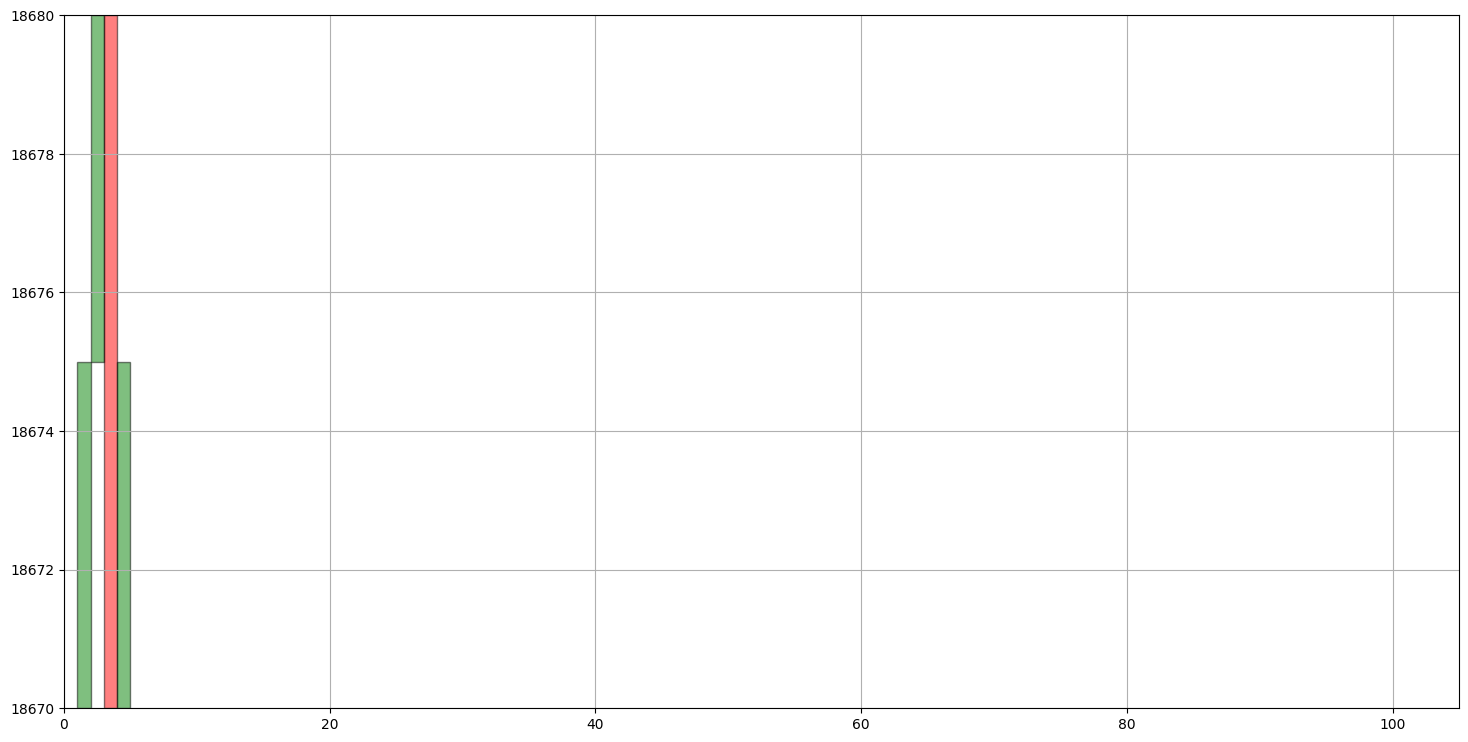

In [123]:
# create the figure
fig = plt.figure(1)
fig.clf()
axes = fig.gca()

# Add 10 extra spaces to the right
num_bars = 100
df = dataframe.tail(num_bars)

renkos = zip(df['open'],df['close'], df['color'])


index = 1

for open_price, close_price, color in renkos:
    # if 'color' = 'G' then 'green' else 'red' for facecolor variable
    facecolor = 'green' if color == 'G' else 'red'
    renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor=facecolor, alpha=0.5)
    axes.add_patch(renko)
    index = index + 1

#adjust the axes
plt.xlim([0, num_bars+5])
plt.ylim([min(min(df['open']),min(df['close'])), max(max(df['open']),max(df['close']))])
plt.grid(True)

plt.show()
